In [1]:
%pip install numpy pandas matplotlib seaborn scikit-learn



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (adjust the path if necessary)
data = pd.read_csv('/Users/ysk/Downloads/Titanic-Dataset.csv')

# Quick look at the data
print(data.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [19]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [20]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [21]:
# Fill missing Age values with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing Embarked values with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column due to many missing values
data.drop('Cabin', axis=1, inplace=True)

# Convert categorical features to numeric (e.g., 'Sex', 'Embarked')
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# Drop columns that might not be useful for prediction
data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

print(data.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


/var/folders/ry/_rlmkzcs5rz9551rxcwt1cjc0000gn/T/ipykernel_9297/1038675396.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/var/folders/ry/_rlmkzcs5rz9551rxcwt1cjc0000gn/T/ipykernel_9297/1038675396.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

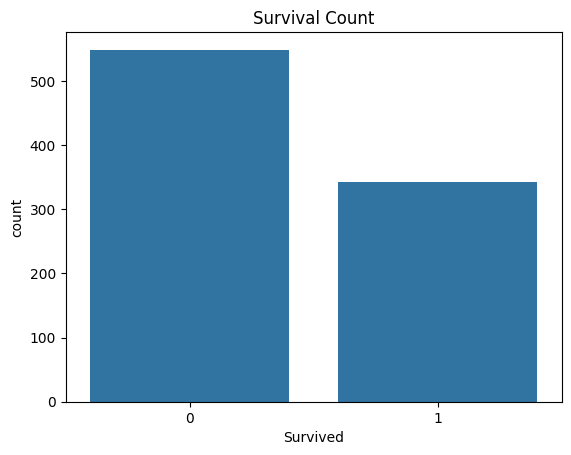

In [22]:
# Survival count
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()



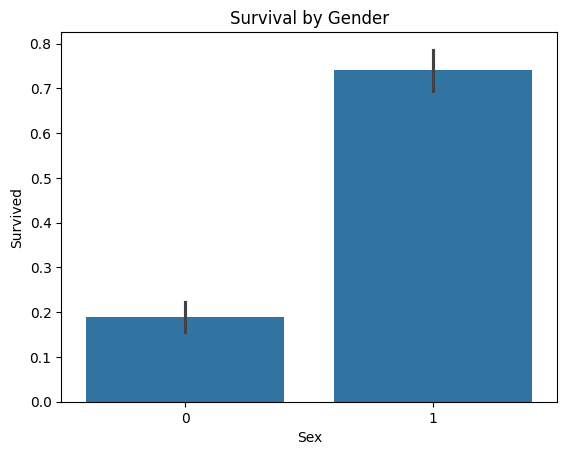

In [23]:
# Survival by gender
sns.barplot(x='Sex', y='Survived', data=data)
plt.title('Survival by Gender')
plt.show()



/var/folders/ry/_rlmkzcs5rz9551rxcwt1cjc0000gn/T/ipykernel_9297/3007893526.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'], hist=False)


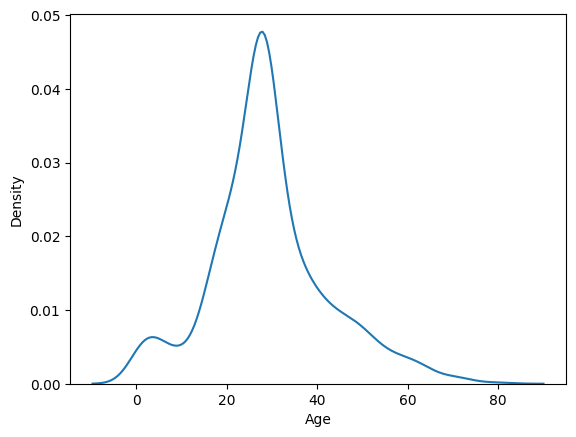

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings

sns.distplot(data['Age'], hist=False)
plt.show()


/var/folders/ry/_rlmkzcs5rz9551rxcwt1cjc0000gn/T/ipykernel_9297/512851191.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


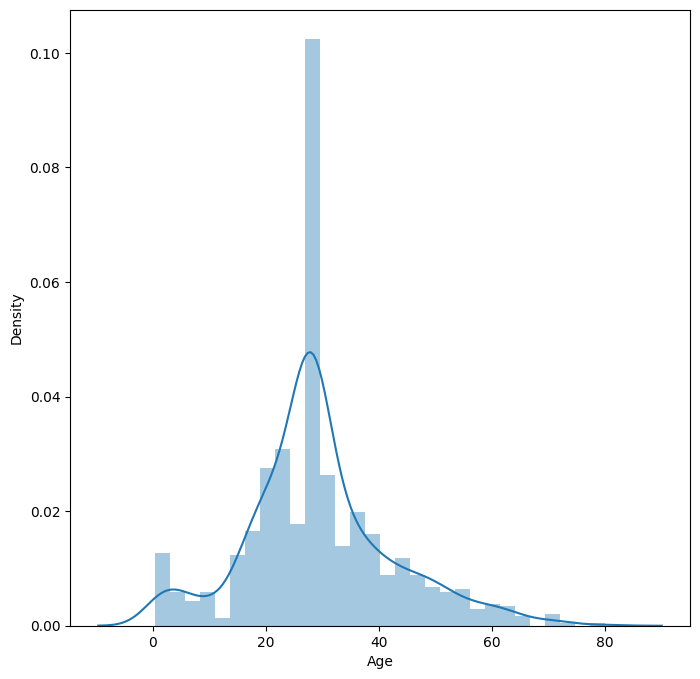

In [25]:
plt.figure(figsize=(8,8))
sns.distplot(data['Age'])
plt.show()


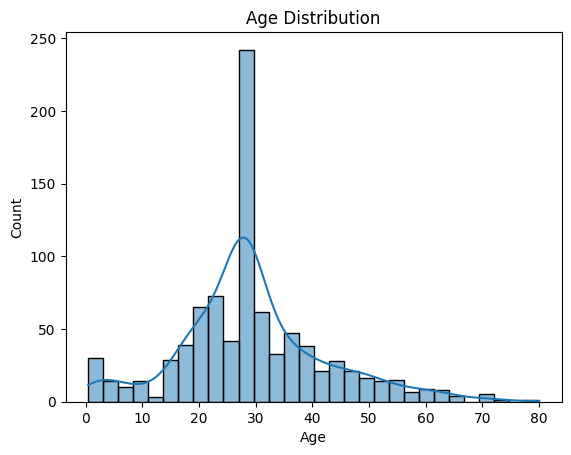

In [26]:
# Age distribution
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


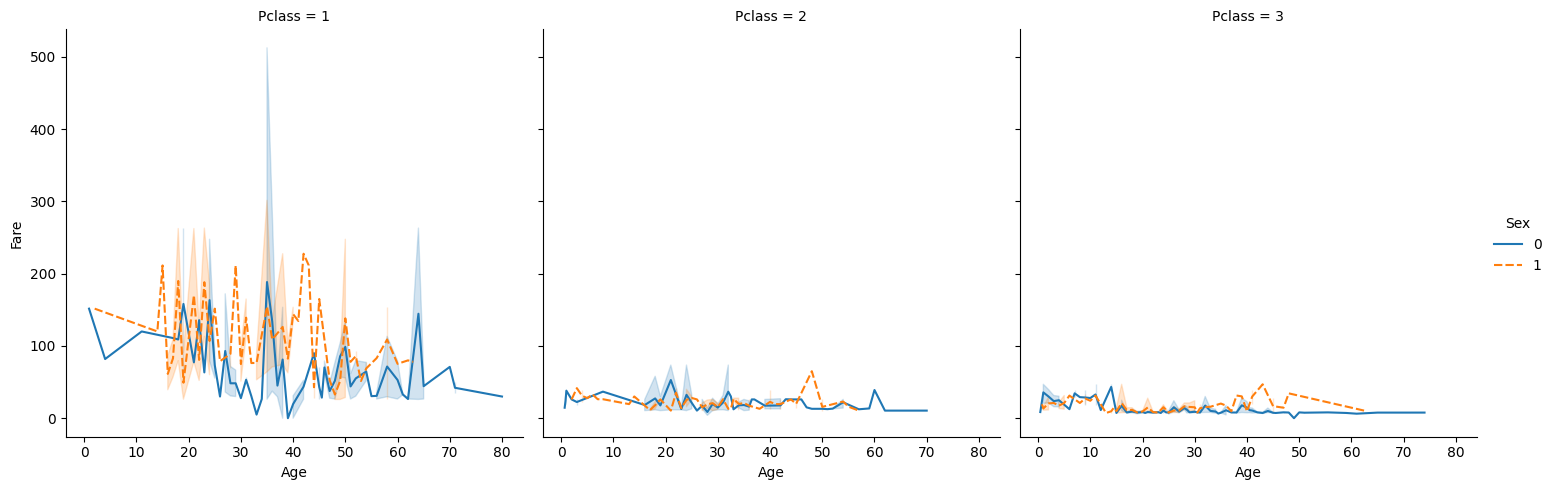

In [27]:
sns.relplot(x="Age", y="Fare", col="Pclass", hue="Sex", style="Sex",kind="line", data=data) # scatter can be used instead of "line" plot
plt.show()


In [28]:
pclass_counts=data['Pclass'].value_counts()
pclass_counts

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

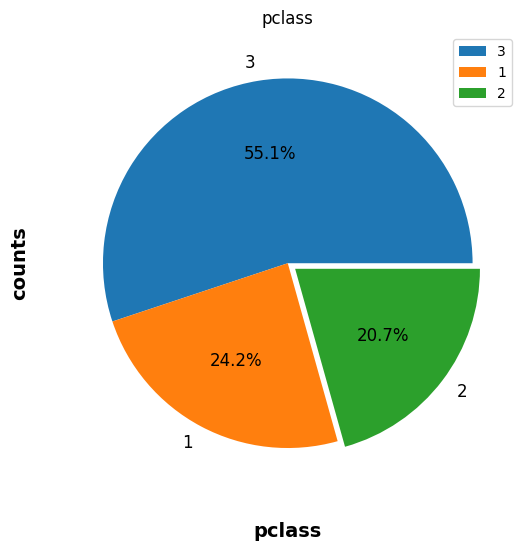

In [29]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = pclass_counts.index, loc = "best")
plt.show()


In [30]:
Survived_counts=data['Survived'].value_counts()
Survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

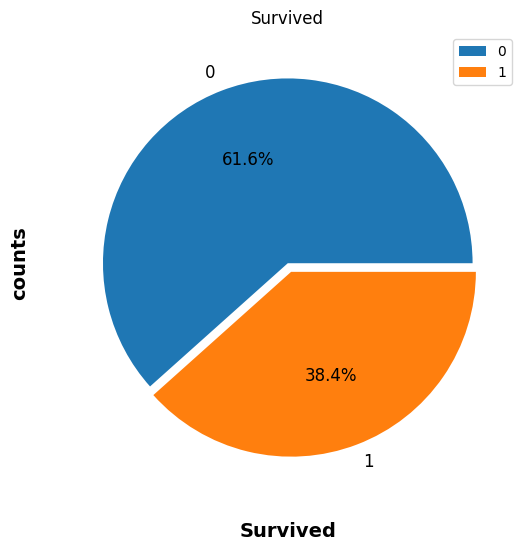

In [31]:
plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()

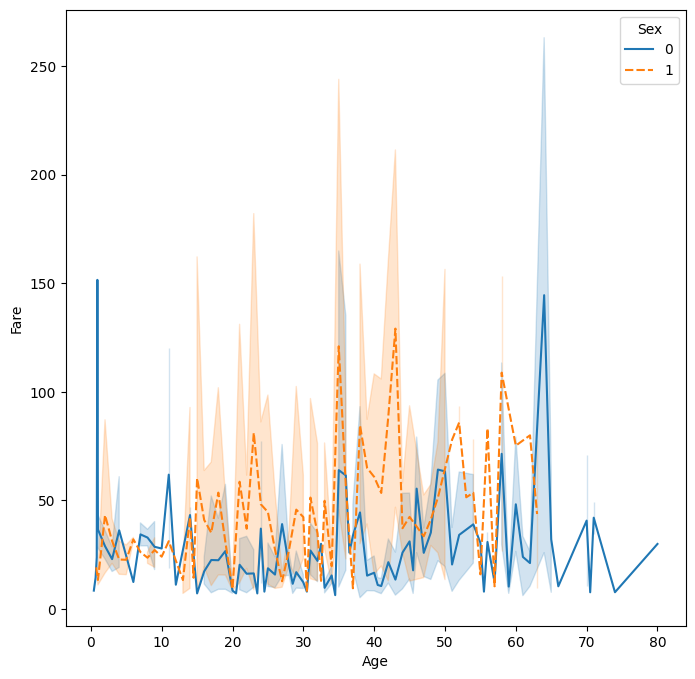

In [32]:
plt.figure(figsize=(8,8))
sns.lineplot(x="Age", y="Fare", hue="Sex", style="Sex", data=data)
plt.show()

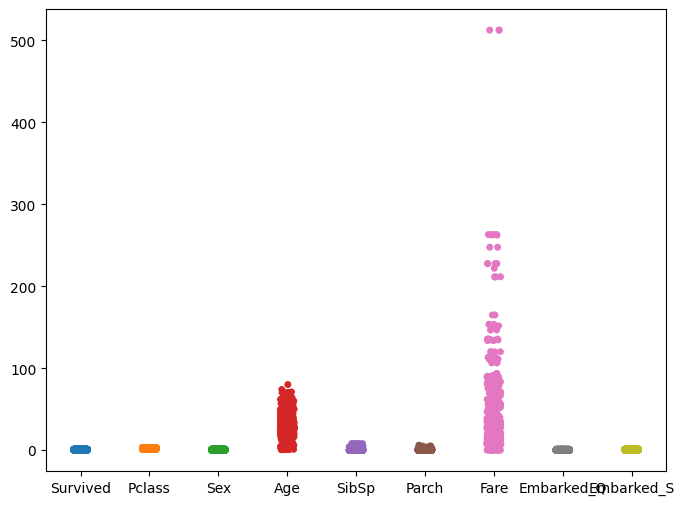

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot( data=data)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV



# Define features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')  # Adjusts weights inversely proportional to class frequencies
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
predictions = model.predict(X_test_scaled)

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy:", scores.mean())



# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Cross-Validation Accuracy: 0.7744146632352018
Accuracy: 0.8156424581005587
Confusion Matrix:
 [[84 21]
 [12 62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84       105
           1       0.75      0.84      0.79        74

    accuracy                           0.82       179
   macro avg       0.81      0.82      0.81       179
weighted avg       0.82      0.82      0.82       179



In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Preprocessing: Handle missing values and encode categorical features
# data = data.dropna()  # Example: Drop rows with missing values
# data = pd.get_dummies(data, columns=['Sex', 'Embarked'])  # Encode categorical variables
param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],  # Solvers that support L1
        'C': [0.01, 0.1, 1, 10]
    },
    {
        'penalty': ['l2'],
        'solver': ['lbfgs', 'sag', 'saga'],  # Solvers for L2
        'C': [0.01, 0.1, 1, 10]
    }
]


# Define features and target
X = data.drop('Survived', axis=1)
y = data['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Best model
best_model = grid.best_estimator_
predictions = best_model.predict(X_test_scaled)

# Evaluate
print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Accuracy: 0.8044692737430168
Confusion Matrix:
 [[93 17]
 [18 51]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [22]:
param_grid = [
    # For L1 penalty (requires liblinear or saga)
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'C': [0.01, 0.1, 1, 10]
    },
    # For L2 penalty (works with most solvers)
    {
        'penalty': ['l2'],
        'solver': ['lbfgs', 'sag', 'saga'],
        'C': [0.01, 0.1, 1, 10]
    }
]

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load/preprocess data (ensure categorical features are encoded, missing values handled)
# Example:
# data = pd.get_dummies(data, columns=['Sex', 'Embarked'])
# data = data.dropna()

# Split data with stratification to preserve class balance
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (critical for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid with compatible solver-penalty pairs
param_grid = [
    {
        'penalty': ['l1'],
        'solver': ['liblinear', 'saga'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'class_weight': ['balanced', None]
    },
    {
        'penalty': ['l2'],
        'solver': ['lbfgs', 'sag', 'saga'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'class_weight': ['balanced', None]
    }
]

# Initialize and fit GridSearchCV
model = LogisticRegression(max_iter=1000)
grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train_scaled, y_train)

# Best model evaluation
best_model = grid.best_estimator_
predictions = best_model.predict(X_test_scaled)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'C': 0.01, 'class_weight': None, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8044692737430168
Confusion Matrix:
 [[102   8]
 [ 27  42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       110
           1       0.84      0.61      0.71        69

    accuracy                           0.80       179
   macro avg       0.82      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load data
data = pd.read_csv('/Users/ysk/Downloads/Titanic-Dataset.csv')

# Feature engineering
data['FamilySize'] = data['SibSp'] + data['Parch']
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data['Title'] = data['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# Encode categorical features
data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Title'], drop_first=True)

# Handle missing values
imputer = SimpleImputer(strategy='median')
data[['Age', 'Fare']] = imputer.fit_transform(data[['Age', 'Fare']])

# Define features/target
X = data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Train Random Forest
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5,
    class_weight='balanced',
    random_state=42
)
model.fit(X_train, y_train)

# Evaluate
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy: 0.8268156424581006
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.80      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



<>:13: SyntaxWarning: invalid escape sequence '\.'
<>:13: SyntaxWarning: invalid escape sequence '\.'
/var/folders/ry/_rlmkzcs5rz9551rxcwt1cjc0000gn/T/ipykernel_22581/4289973183.py:13: SyntaxWarning: invalid escape sequence '\.'
  data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [28]:
data['AgeBin'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'MidAge', 'Senior'])
data['FareBin'] = pd.qcut(data['Fare'], 5, labels=[1, 2, 3, 4, 5])  # Quantile-based binning

In [29]:
data['Age_Pclass'] = data['Age'] * data['Pclass']

In [30]:
data['Deck'] = data['Cabin'].str[0].fillna('Unknown')

In [32]:
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000)
selector = RFE(model, n_features_to_select=8)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)

In [33]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(best_model, random_state=42).fit(X_test_scaled, y_test)
eli5.show_weights(perm, feature_names=list(X.columns))

ModuleNotFoundError: No module named 'eli5'

In [34]:
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

estimators = [
    ('lr', LogisticRegression()),
    ('xgb', XGBClassifier()),
    ('svc', SVC(probability=True))
]
voting_model = VotingClassifier(estimators, voting='soft')
voting_model.fit(X_train_scaled, y_train)

ModuleNotFoundError: No module named 'xgboost'

In [36]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='rbf', probability=True, random_state=42))
]

# Create a StackingClassifier
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Train the stacking classifier on the SMOTE-resampled data
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking classifier on the test set
y_pred_stack = stacking_clf.predict(X_test)
print("Stacking Test Accuracy:", accuracy_score(y_test, y_pred_stack))
print("Stacking Confusion Matrix:\n", confusion_matrix(y_test, y_pred_stack))
print("Stacking Classification Report:\n", classification_report(y_test, y_pred_stack))


Stacking Test Accuracy: 0.8100558659217877
Stacking Confusion Matrix:
 [[94 16]
 [18 51]]
Stacking Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85       110
           1       0.76      0.74      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

